# 3. Exploratory Data Analysis

## Contents<a id='3_Contents'></a>
* [1. Introduction](#1_Introduction)
  * [1.1. Purpose of the Problem](#1.1_Purpose_of_the_Problem)
* [2.1. Importing necessary packages](#2.1_Importing_necessary_packages)
* [2.2. Load the dataset](#2.2_Load_the_dataset)
* [2.3. Explore the data](#2.3_Explore_the_data)
* [3. Exploratory Data Analysis](#3.6_Exploratory_Data_Analysis)
  * [3.1. Numerical/Continuous_variables_analysis](#3.1_Numerical/Continuous_variables_analysis)
  * [3.2. Categorical_variables_analysis](#3.2_Categorical_variables_analysis)


## 1. Introduction<a id='1.1_Introduction'></a>

The business problem is the Customer Lifetime Value Prediction for E-commerce platforms. The Customer Lifetime Value represents the total amount of money a customer is expected to spend in business, or on products, during their lifetime. It helps company to make decisions about how much money to invest in acquiring new customers and retaining existing ones.

In this notebook, I will explore and analyze the relationships between CLTV and other variables, such as income, employment status, marital status etc., as well as determine the correlations between features and target and features and features


### 1.1 Purpose of the Problem<a id= '3.1.1_Purpose_of_the_Problem'></a>

The importance and purpose of the project is to build a model which predicts which customers most likely to be retained.

## 2.1. Importing necessary packages<a id= '3.2_Importing_necessary_packages'></a>

In [1]:
# Import pandas, matplotlib.pyplot, seaborn, datetime, numpy-all necessary packages
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import numpy as np
import seaborn as sns
import seaborn as seabornInstance
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from matplotlib import pyplot as plt
from matplotlib import style
import scipy.stats as stats
from datetime import datetime

## 2.2. Load the dataset<a id= '3.3_Load_the_dataset'></a>

In [2]:
# Load the dataset
from google.colab import files
uploades = files.upload()
df = pd.read_csv("IBM-Marketing-Customer-Value-Analysis.csv", encoding = "latin-1")

Saving IBM-Marketing-Customer-Value-Analysis.csv to IBM-Marketing-Customer-Value-Analysis.csv


## 2.3. Explore the data <a id='3.4_Explore_the_data'></a>

In [3]:
# Review the first 5 rows of the dataset
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
df.tail()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large
9133,Y167826,California,2611.836866,No,Extended,College,2/14/11,Unemployed,M,0,...,90,0,1,Corporate Auto,Corporate L3,Offer4,Call Center,369.600000,Two-Door Car,Medsize


In [5]:
df.shape

(9134, 24)

In [6]:
# Review the data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [7]:
# Review the data types
df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

There are 9134 rows and 24 columns. The row starts at 0 and ends at 9133. 
There are numerical (all are continuous) and categorical data. 

Categorical data- Customer, State, Response, Coverage, Education, Effective To Date, EmploymentStatus, Gender, Location Code, Marital Status, Policy Type, Policy, Renew Offer Type, Sales Channel, Vehicle Class, Vehicle Size

Numerical/continuous data- Customer Lifetime value, Income, Monthly Premium Auto, Months Since Last Claim, Months Since Policy Inception, Number of Open Complaints, Number of Policies, Total Claim Amount.

###### Always make sure that numerical and categorical variables are correctly classified. Not every numerical value represents non-categorical variables. Moreover, sometimes datetime data is being classified as 'object', in this case it is cruical to convert it to a datetime object.

In [8]:
# Identify number of non-null values
df.isna().sum().sum()

0

There are no non-null values, therefore no further action is required to replace the non-null values

In [9]:
# Find out percentage of the unique values per column
for name in df.columns:
   print(name + " - " + str(round(100 * (df[name].nunique()/df[name].size),2)) + "%")

Customer - 100.0%
State - 0.05%
Customer Lifetime Value - 88.03%
Response - 0.02%
Coverage - 0.03%
Education - 0.05%
Effective To Date - 0.65%
EmploymentStatus - 0.05%
Gender - 0.02%
Income - 62.34%
Location Code - 0.03%
Marital Status - 0.03%
Monthly Premium Auto - 2.21%
Months Since Last Claim - 0.39%
Months Since Policy Inception - 1.09%
Number of Open Complaints - 0.07%
Number of Policies - 0.1%
Policy Type - 0.03%
Policy - 0.1%
Renew Offer Type - 0.04%
Sales Channel - 0.04%
Total Claim Amount - 55.9%
Vehicle Class - 0.07%
Vehicle Size - 0.03%


In [10]:
# Number of the unique values of each column
df.nunique()

Customer                         9134
State                               5
Customer Lifetime Value          8041
Response                            2
Coverage                            3
Education                           5
Effective To Date                  59
EmploymentStatus                    5
Gender                              2
Income                           5694
Location Code                       3
Marital Status                      3
Monthly Premium Auto              202
Months Since Last Claim            36
Months Since Policy Inception     100
Number of Open Complaints           6
Number of Policies                  9
Policy Type                         3
Policy                              9
Renew Offer Type                    4
Sales Channel                       4
Total Claim Amount               5106
Vehicle Class                       6
Vehicle Size                        3
dtype: int64

In [11]:
# Identify the range of the columns
df.agg([min,max]).T

,min,max
Customer,AA10041,ZZ97035
State,Arizona,Washington
Customer Lifetime Value,1898.007675,83325.38119
Response,No,Yes
Coverage,Basic,Premium
Education,Bachelor,Master
Effective To Date,1/1/11,2/9/11
EmploymentStatus,Disabled,Unemployed
Gender,F,M
Income,0,99981


In [12]:
# Review the summary statistics
df.select_dtypes(include = 'number').describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
Income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
Monthly Premium Auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
Months Since Last Claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
Months Since Policy Inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
Number of Open Complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
Number of Policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
Total Claim Amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


In [13]:
# Identify number of missing values by column
na_values = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
na_values.columns=['Count', '%']
na_values.sort_values(by= ['Count'], ascending=False)

,Count,%
Customer,0,0.0
State,0,0.0
Vehicle Class,0,0.0
Total Claim Amount,0,0.0
Sales Channel,0,0.0
Renew Offer Type,0,0.0
Policy,0,0.0
Policy Type,0,0.0
Number of Policies,0,0.0
Number of Open Complaints,0,0.0


There are no missing values, therefore no further action is required to replace the missing values

In [14]:
# Identify duplicate rows
df[df.duplicated()]

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size


There are no duplicate rows, no action is required to drop the duplicate rows or to determine if the duplicate like rows are actually consist of unique values

## 3. Exploratory Data Analysis<a id='3.6_Exploratory_Data_Analysis'></a>

### 3.1. Numerical/Continuous variables analysis <a id= '3.6.1_Numerical/Continuous_variables_analysis'></a>

In [15]:
# Overview of the data
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


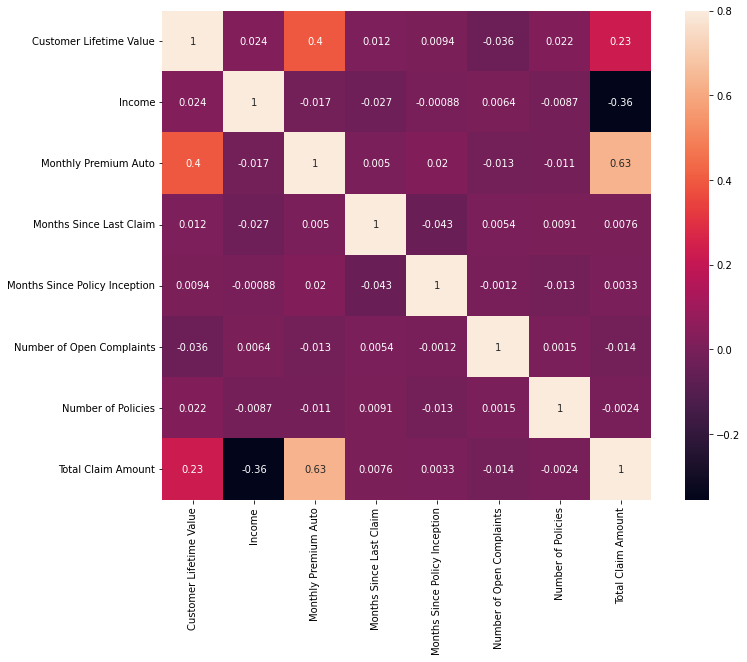

In [16]:
# Heatmap to see correlation between continuos independent variables with the target variable(Customer Lifetime Value)
corrmat = df.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True, annot = True)
plt.show()

Customer Lifetime Value is positively correlated with Monthly Premium Auto and Total Claim Amount

#### Analysis of Monthly Premium Auto

In [17]:
df['Monthly Premium Auto'].describe()

count    9134.000000
mean       93.219291
std        34.407967
min        61.000000
25%        68.000000
50%        83.000000
75%       109.000000
max       298.000000
Name: Monthly Premium Auto, dtype: float64

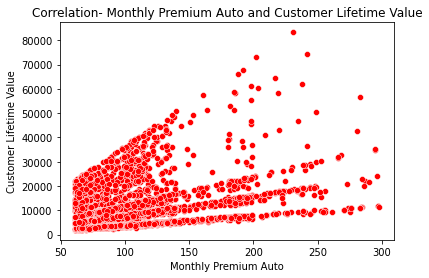

In [18]:
ax = sns.scatterplot(x="Monthly Premium Auto", y="Customer Lifetime Value", color= 'red', data=df)
ax.set_title("Correlation- Monthly Premium Auto and Customer Lifetime Value")
ax.set_xlabel("Monthly Premium Auto");

- Maximum Monthly Premium Amount (MPA) is 298 and the minimum MPA is 61
- Mean of MPA is 93.21929 and the Median is 84.00
- The Standard Deviation is 34.40797
- Skewness is positive

#### Analysis of Total Claim Amount

In [19]:
df['Total Claim Amount'].describe()

count    9134.000000
mean      434.088794
std       290.500092
min         0.099007
25%       272.258244
50%       383.945434
75%       547.514839
max      2893.239678
Name: Total Claim Amount, dtype: float64

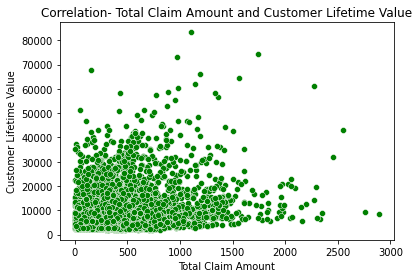

In [20]:
ax = sns.scatterplot(x="Total Claim Amount", y="Customer Lifetime Value", color= 'green', data=df)
ax.set_title("Correlation- Total Claim Amount and Customer Lifetime Value")
ax.set_xlabel("Total Claim Amount");

- Maximum Total Claim Amount (TCA) is 293 and the minimum TCA is 0.099007
- Mean of TCA 434.088794 and the Median is 383.945434
- The Standard Deviation is 290.500092
- Skewness is positive
- Not as skewed or as long tailed as MPA

### 3.2. Categorical variables analysis <a id= '3.6.1_Categorical_variables_analysis'></a>

In [21]:
# Analysis of categorical variables vs Customer Lifetime Value
categorical_var=['State', 'Response', 'Coverage',
       'Education', 'EmploymentStatus', 'Gender',
       'Marital Status', 'Number of Policies', 'Policy Type', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size']


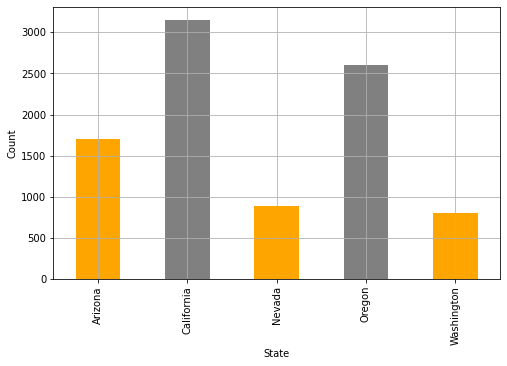

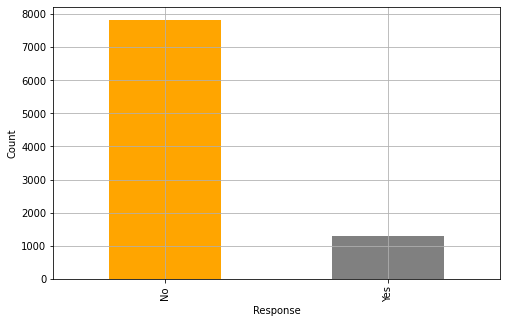

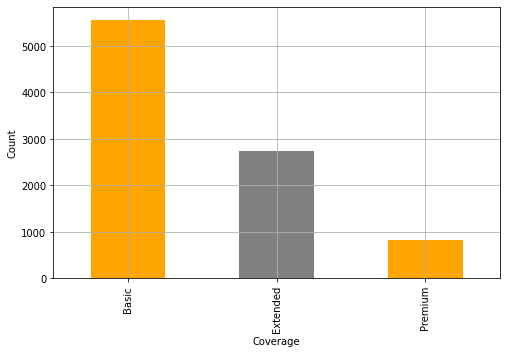

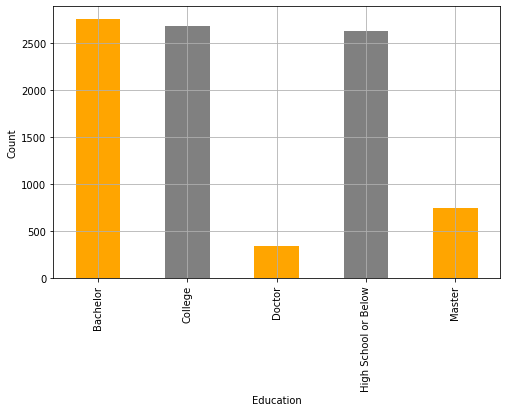

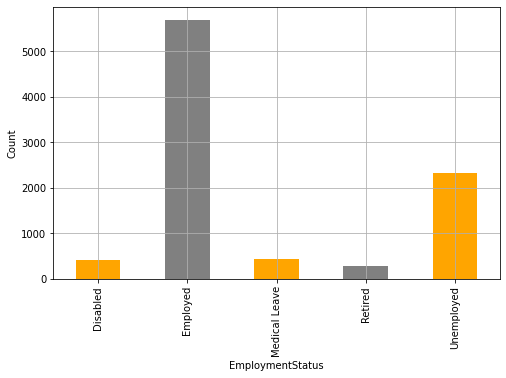

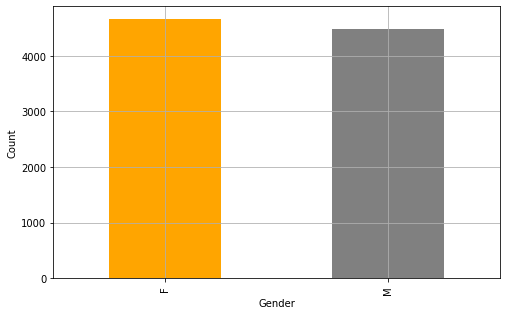

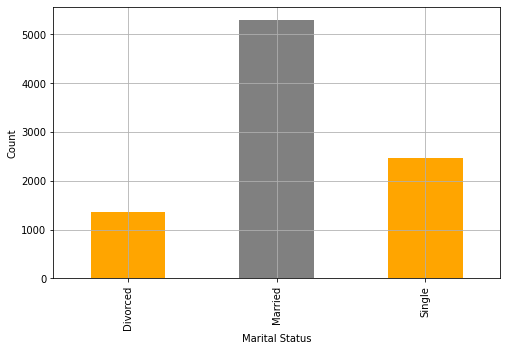

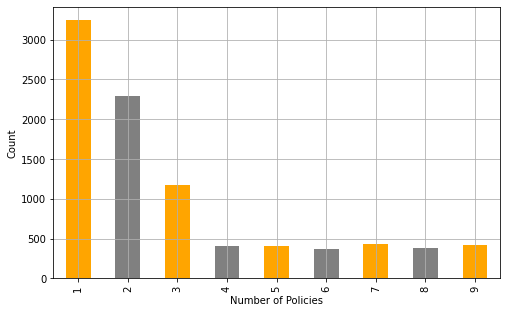

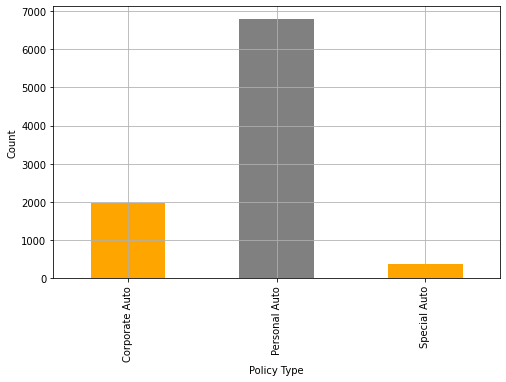

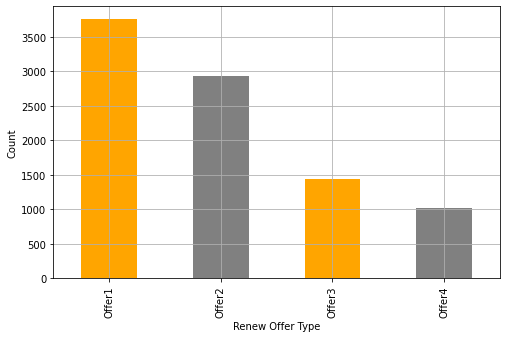

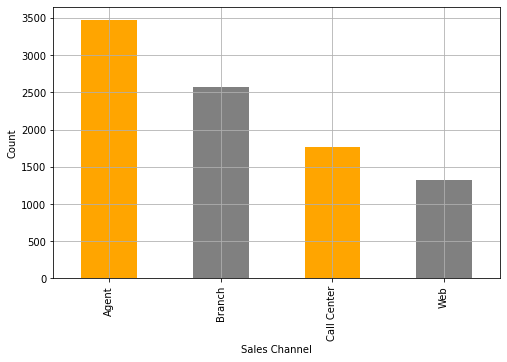

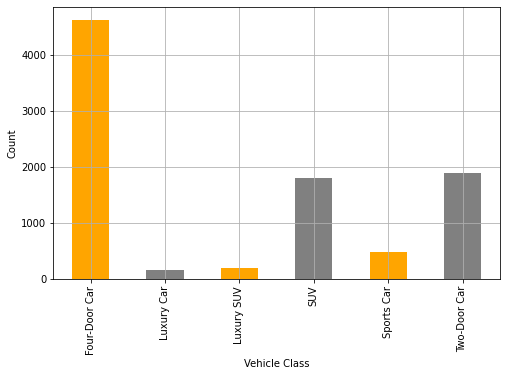

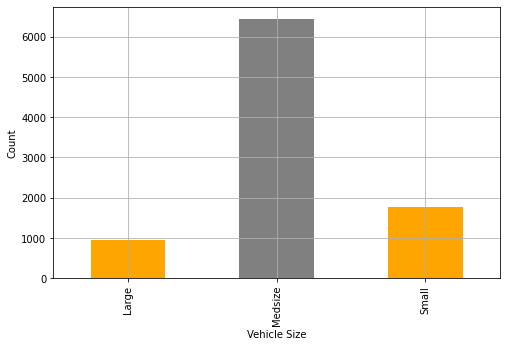

In [22]:
for i in categorical_var:
    df.groupby(i)['Customer Lifetime Value'].count().plot(kind='bar', color=('orange', 'grey'),grid=True,
    figsize=(8, 5)).set_ylabel('Count')
    plt.show()

##### Results
1. State vs CLTV: California residents are the most valuable customers in comparison to other states
2. Response vs CLTV: Customers responded "No" to the marketing inititatives are the most valuable to the company
3. Coverage vs CLTV: Basic coverage is the most chosen option, therefore most valuable
3. Education vs CLTV: Level of education does not affect the lifetime value of the customer
4. Employment status vs CLTV: Employed customers are the most valuable to the company
5. Gender vs CLTV: Gender has no impact on Customer LifeTime value
6. Marital status vs CLTV: Married customers are the most valuable to the company
7. Policy Number vs CLTV: Customer with Policy number 1 are the most valuable to the company
8. Policy Type vs CLTV: Personal policies are the most valuable
10. Renew Offer Type: Customers preferring Offer 1 are the most valuable ones to the company
11. Sales Channel vs CLTV: Call Center is not performing well comparerd to other channels throughout the country (in terms of high value customers). While customers utilize Agent as a channel are the most valuable to the company.
12. Vehicle Class vs CLTV: Customers having Four-Door Car are the most valuable
13. Vehicle Size vs CLTV: MedSize vehicle owners are the most valuable customers


In [23]:
# Drop unneccessary columns
df_dropped = df.drop(['Monthly Premium Auto', 'Total Claim Amount','Number of Open Complaints','State','Income', 'Months Since Last Claim', 'Months Since Policy Inception','Customer','Response','Education','Effective To Date','EmploymentStatus','Gender','Location Code','Marital Status','Policy','Sales Channel'], axis=1)

In [24]:
# Get dummies for categorical variables
Categorical = ['Coverage', 'Policy Type','Vehicle Size', 'Number of Policies']
df1 = pd.get_dummies(df_dropped, columns = Categorical)

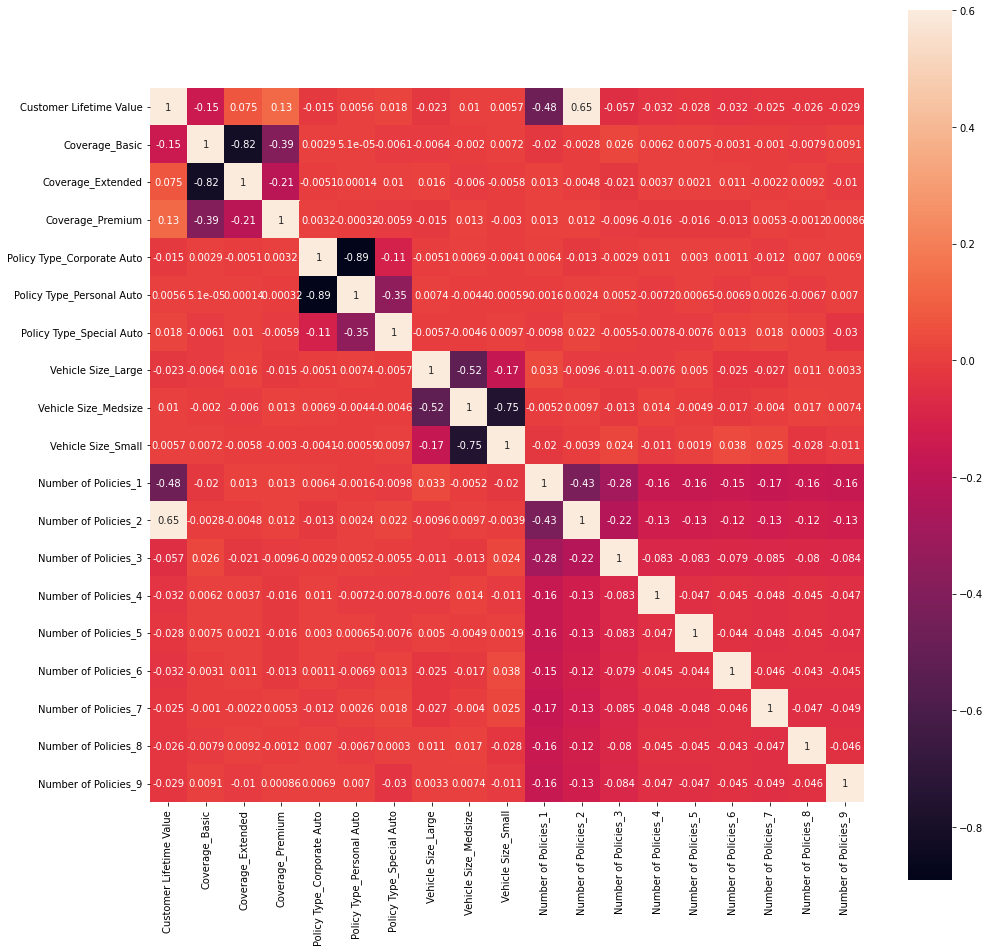

In [25]:
# Heatmap categorical values(dummies)

corr_cat = df1.corr()
fig = plt.figure(figsize = (16, 16))

sns.heatmap(corr_cat, vmax = .6, square = True, annot = True)
plt.show()